In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole


In [2]:
ms = [x for x in Chem.SDMolSupplier('./PBF_egfr.sdf')]

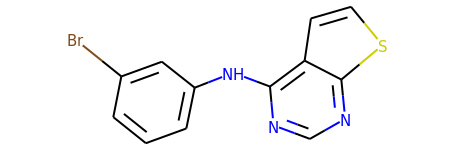

In [3]:
ms[0]

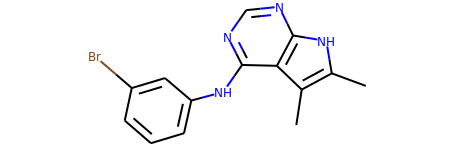

In [4]:
ms[2]

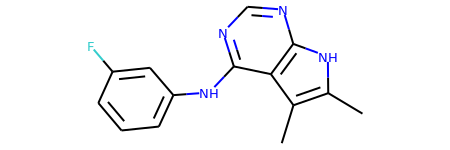

In [5]:
ms[3]

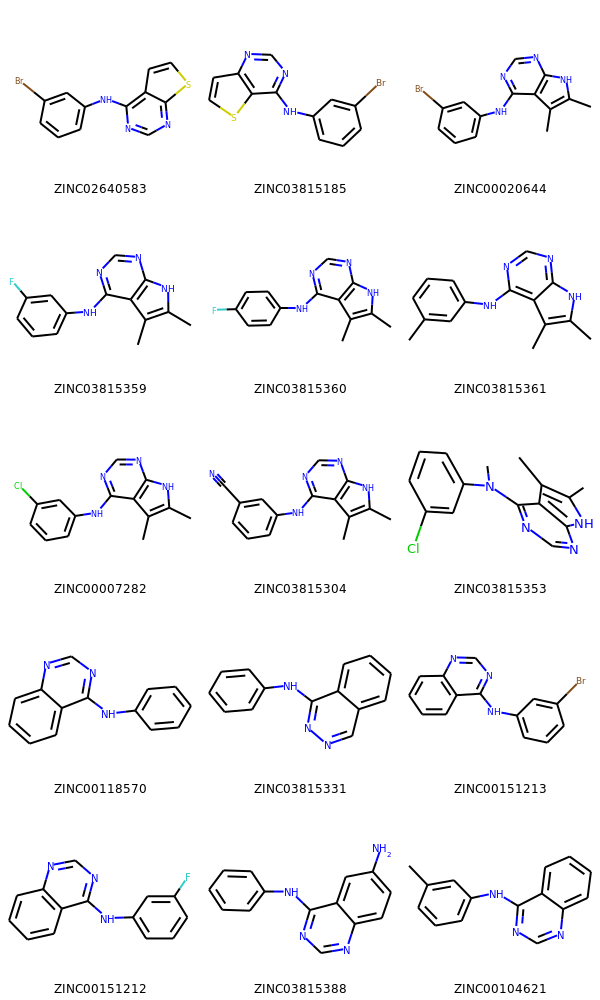

In [8]:
legends = [x.GetProp('_Name') for x in ms]
Draw.MolsToGridImage(ms[:15],legends=legends[:15])

In [9]:
from rdkit.Chem import AllChem
mhs = [x for x in Chem.SDMolSupplier('./PBF_egfr.sdf',removeHs=False)]

In [11]:
ps = AllChem.ETKDG()
for mh in mhs[:10]:
    AllChem.EmbedMultipleConfs(mh,10,ps)

In [12]:
[x.GetNumConformers() for x in mhs[:10]]

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [15]:
outf = Chem.SDWriter('EGFR_first10_10confs.sdf')
for m in mhs[:10]:
    for conf in m.GetConformers():
        outf.write(m,confId=conf.GetId())
outf.flush()
outf=None